In [2]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic[titanic.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [6]:
titanic.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
titanic.embarked.value_counts() #waar zij de meeste mensen opgestapt? Southampton opgave 34

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [8]:
titanic.embarked.mode()

0    S
dtype: object

In [9]:
pd.crosstab(titanic.embarked, titanic.survived)

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [10]:
titanic[titanic.survived == 1]['embarked'].value_counts()

S    217
C     93
Q     30
Name: embarked, dtype: int64

In [11]:
pd.crosstab(titanic.pclass, titanic.embarked, values = titanic.fare, aggfunc = 'median')

embarked,C,Q,S
pclass,,,
1,78.2667,90.00,52.00
2,24.0000,12.35,13.50
3,7.8958,7.75,8.05


In [12]:
data = titanic[titanic.pclass == 1]
print(data[data.embarked == 'C'].fare)

1       71.2833
30      27.7208
31     146.5208
34      82.1708
52      76.7292
         ...   
839     29.7000
842     31.0000
849     89.1042
879     83.1583
889     30.0000
Name: fare, Length: 85, dtype: float64


In [13]:
titanic.loc[titanic.embarked.isnull(), 'embarked'] = 'C'
titanic[titanic.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [14]:
len(titanic[titanic.age.isnull()])

177

In [15]:
pd.options.display.max_rows = 10
titanic[titanic.age.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


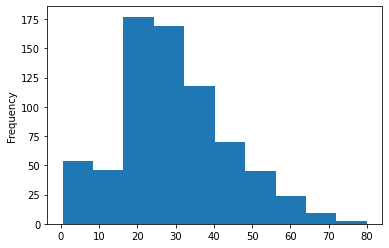

In [16]:
titanic.age.plot.hist('histogram leeftijd')

In [17]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


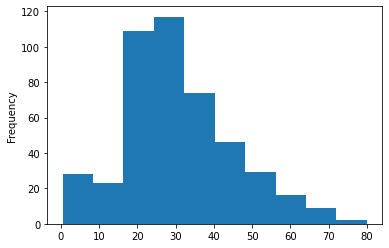

In [18]:
mannen = titanic[titanic.sex == 'male']
mannen.age.plot.hist('Histogram leeftijd mannen')

In [19]:
mannen.describe()

,survived,pclass,age,sibsp,parch,fare
count,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


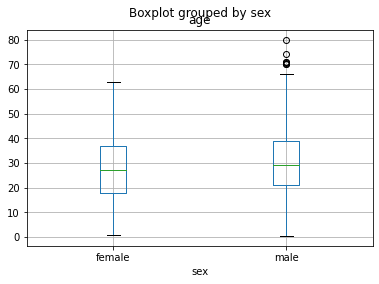

In [20]:
titanic.boxplot(by = 'sex', column = 'age')

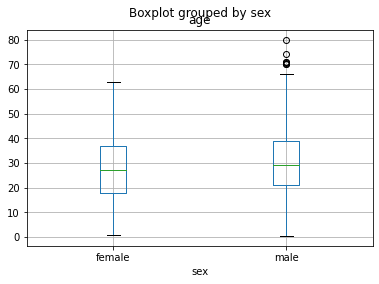

In [21]:
titanic.boxplot('age', 'sex')

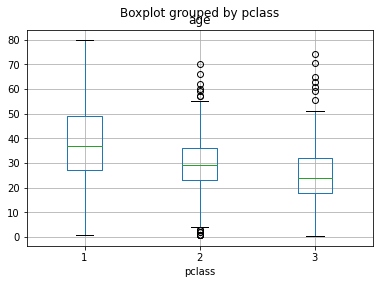

In [22]:
titanic.boxplot('age', 'pclass')

In [23]:
pclass_age_median = titanic.groupby('pclass').age.transform('median')
print(pclass_age_median)
titanic.age.fillna(pclass_age_median, inplace=True) #lege velden opvullen met de mediaan van de leeftijd

0      24.0
1      37.0
2      24.0
3      37.0
4      24.0
       ... 
886    29.0
887    37.0
888    24.0
889    37.0
890    24.0
Name: age, Length: 891, dtype: float64


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


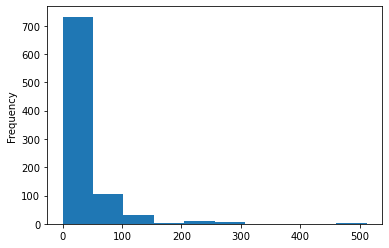

In [25]:
titanic.fare.plot.hist('fare')

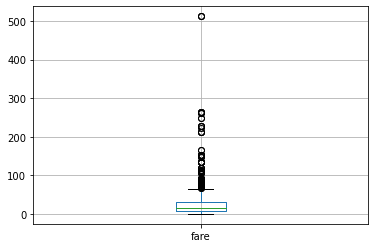

In [26]:
titanic.boxplot('fare')

In [27]:
titanic[titanic.fare == titanic.fare.max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [28]:
pd.qcut(titanic['fare'], 4, labels = ['zeer laag', 'laag', 'hoog', 'zeer hoog'])

0      zeer laag
1      zeer hoog
2           laag
3      zeer hoog
4           laag
         ...    
886         laag
887         hoog
888         hoog
889         hoog
890    zeer laag
Name: fare, Length: 891, dtype: category
Categories (4, object): [zeer laag < laag < hoog < zeer hoog]

In [29]:
pd.qcut(titanic['fare'], 4, labels = ['zeer laag', 'laag', 'hoog', 'zeer hoog']).value_counts()

laag         224
zeer laag    223
zeer hoog    222
hoog         222
Name: fare, dtype: int64

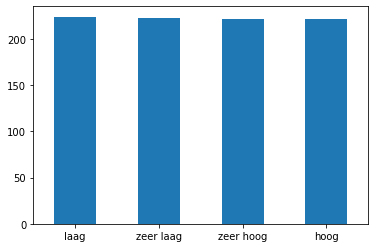

In [30]:
pd.qcut(titanic['fare'], 4, labels = ['zeer laag', 'laag', 'hoog', 'zeer hoog']).value_counts().plot.bar(rot=0)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Text(0, 0.5, 'dichtheid')

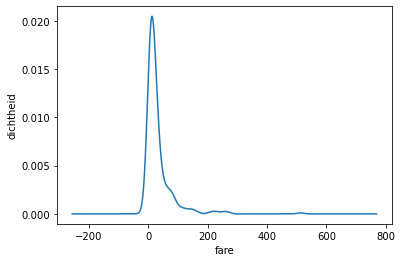

In [32]:
import matplotlib.pyplot as plt
titanic.fare.plot.density()
plt.xlabel("fare")
plt.ylabel("dichtheid")

In [38]:
titanic.fare.skew(); #rechtsscheve functie

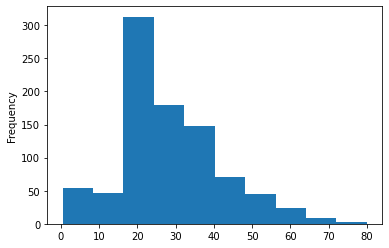

In [35]:
titanic.age.plot.hist()

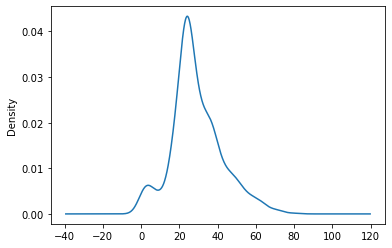

In [36]:
titanic.age.plot.kde()

In [37]:
titanic.age.skew()

0.548255729646475

In [39]:
print(titanic.age.mean()) #gemiddelde
print(titanic.age.std()) #standaardafwijking

29.06640852974186
13.244531842087222


In [40]:
import scipy.stats as stats #de kans dat iemand tussen de 20 en 30 jaar is.
import math
stats.norm.cdf(30, titanic.age.mean(), titanic.age.std()) - stats.norm.cdf(20, titanic.age.mean(), titanic.age.std())

0.28128050355814804

In [42]:
data = titanic[(titanic.age >= 20) & (titanic.age <= 30)]
len(data)

392

In [44]:
len(data) / len(titanic)

0.4399551066217733